<a href="https://colab.research.google.com/github/Dalejandro6174/Dalejandro6174/blob/main/Metododelasdiferenciasinfinitasecuaciondeonda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Duvian alejandro Gal
Email: duvianvergara@gmail.com
      
Archivo: ejemploe solucion de ecuaion de onda metodos numericos .py


Objetivo: Algoritmo 12.4
          Texto de Burden pag. 739 ed9
          Solucion Ecuacion de onda
          Metodo de las diferencias finitas.
          Primer avance
          Continuacion _25
          Ejemplo 1 pag 743
          Graficos adicionales
          Nueva condicion inicial

Comparacion Tabla 12.6
--x--+-----w----
0.0 0.0
0.1 0.30901699437494745
0.2 0.5877852522924734
0.30000000000000004 0.8090169943749475
0.4 0.9510565162951539
0.5 1.0
0.6000000000000001 0.9510565162951538
0.7000000000000001 0.8090169943749475
0.8 0.5877852522924732
0.9 0.30901699437494745
1.0 0.0


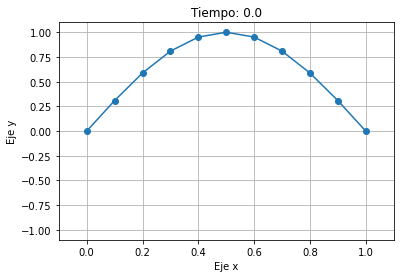

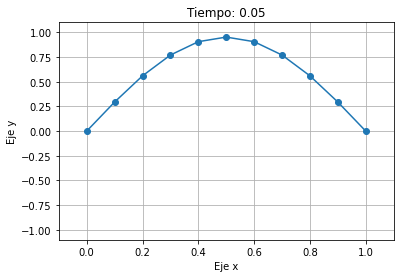

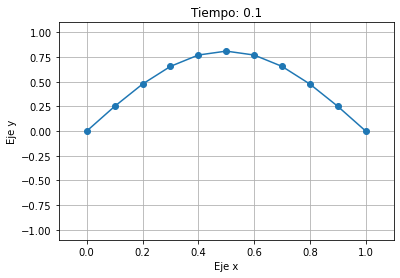

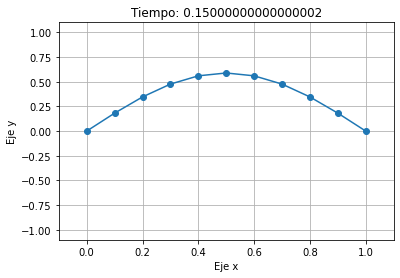

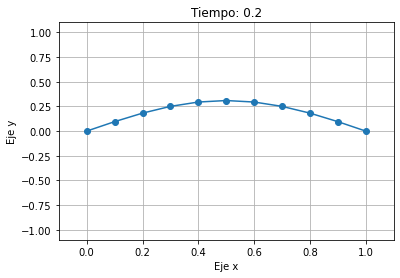

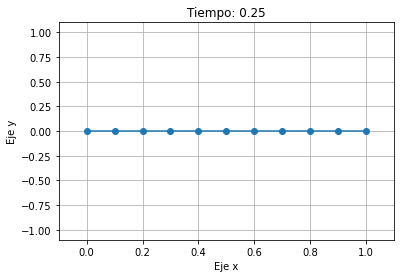

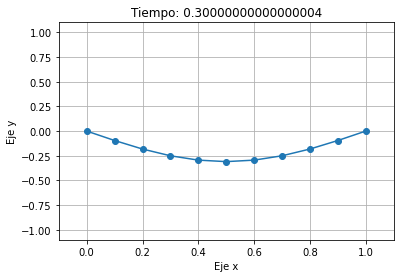

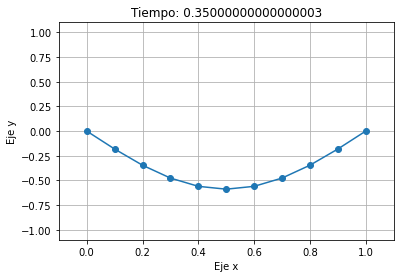

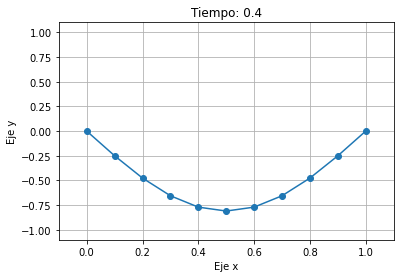

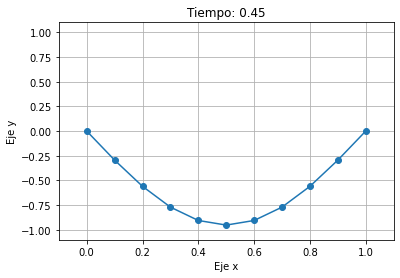

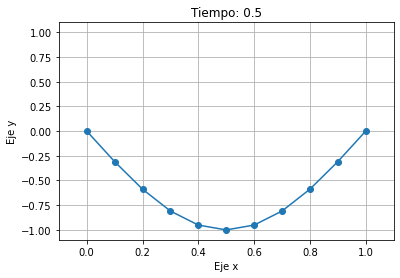

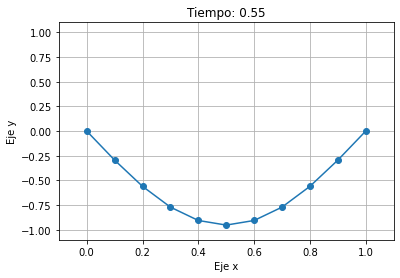

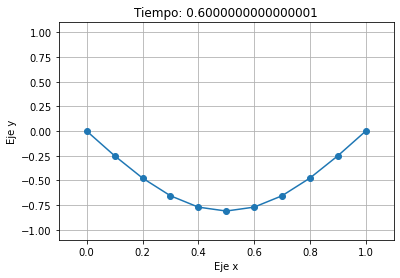

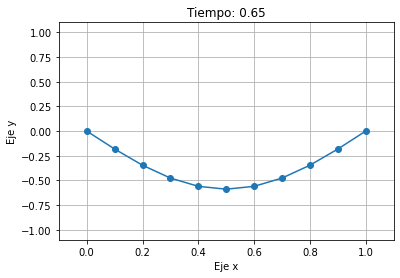

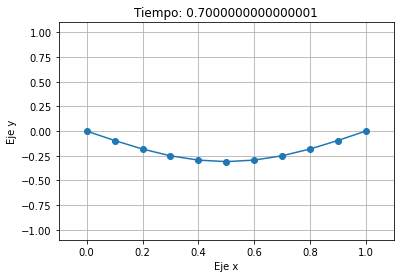

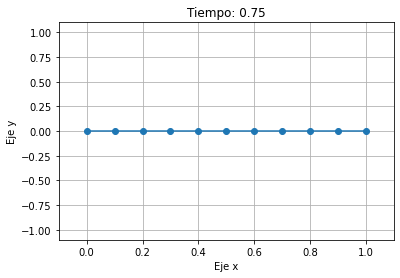

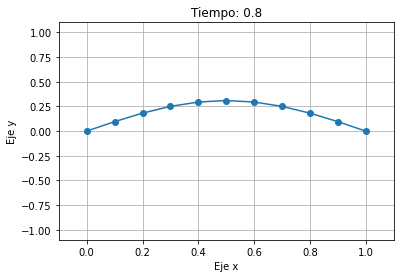

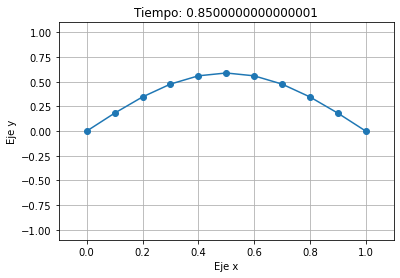

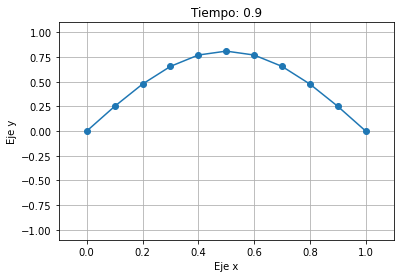

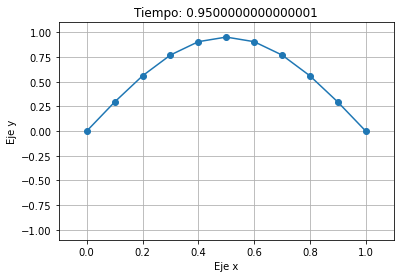

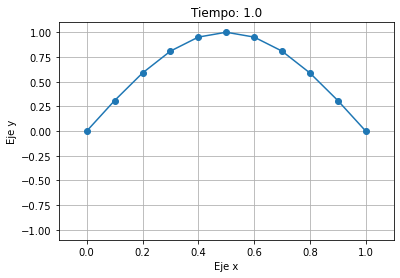

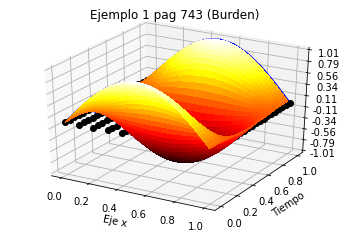

In [2]:

##importaciones
import os
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl


            
##codigo principal

#Entradas
L = 1.0 #Valor maximo x
T = 1.0 #Valor maximo de tiempo

alpha = 2.0 #Constante de velocidad
m = 10 #discretizacion x (i)
N = 20 #discretizacion t (j)

L_x = np.linspace(0,L,m+1)#lista valores x
L_t = np.linspace(0,T,N+1)#lista valores t

f = lambda x:np.sin(np.pi*x) #Condicion inicial posicion f(x) u(x,0)

g = lambda x:0*x #Condicion inicial velocidad  du(x,0)

U_0_t = lambda t:0 #Condicion de frontera 0
U_L_t = lambda t:0 #Condicion de frontera L

#Inicializacion solucion con ceros
W = np.zeros((m+1,N+1)) #aproximacion de la solucion u(xi,tj)

#Step 1
h = L/m # discretizacion x
k = T/N # discretizacion t
Lamb = k*alpha/h # conste

#Step 2
# ya esta inicializado todo en ceros

#Step 3
W[0,0]= f(0) #
W[m,0]= f(L)

#Step 4
ac = 1-Lamb**2
bc = (Lamb**2)/2

for i in range(1,m):
    W[i,0] = f(L_x[i])
    W[i,1] = ac*f(L_x[i]) + bc*(f(L_x[i+1])+f(L_x[i-1])) + k*g(L_x[i])

#Step 5

for j in range(1,N):
    for i in range(1,m):
        W[i,j+1] = 2*ac*W[i,j] + (Lamb**2)*(W[i+1,j]+W[i-1,j]) - W[i,j-1]
        

#Visualizacion
print("Comparacion Tabla 12.6")
print("--x--+-----w----")
for i,q in enumerate(W[:,20]):
	print(L_x[i],q)

for j in range(N+1): #secuencia grafica
	pl.plot(L_x,W[:,j],'o-')
	pl.title("Tiempo: "+str(L_t[j]))
	pl.xlabel("Eje x")
	pl.ylabel("Eje y")
	pl.grid('on')
	pl.ylim([-1.1,1.1])
	pl.xlim([-0.1,1.1])
	pl.show()

###grafico 3d

mpl.rcParams['legend.fontsize'] = 10
fig = pl.figure()
ax = fig.gca(projection='3d')

x = L_x
zo = np.zeros((m+1,))
for j in range(N+1):
    z = W[:,j]
    y = L_t[j]*np.ones((m+1,))
    ax.plot(x, y, z,'b-')
    ax.plot(x, y, zo,'ko')
###grafico surface
Xs = np.arange(0, 1, 0.01)
Ts = np.arange(0, 1, 0.01)
Xss, Tss = np.meshgrid(Xs, Ts)
##solucion exacta
Zss = np.sin(np.pi*Xss)*np.cos(2*np.pi*Tss)

### Plot the surface.
surf = ax.plot_surface(Xss, Tss, Zss, cmap=cm.hot,
                       linewidth=1, antialiased=False)

### Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

pl.xlabel("Eje x")
pl.ylabel("Tiempo")
pl.title("Ejemplo 1 pag 743 (Burden)")
pl.show()